# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Customer Churn Dataset](https://www.kaggle.com/datasets/jayjoshi37/customer-subscription-churn-and-usage-patterns/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

/kaggle/input/customer-subscription-churn-and-usage-patterns/customer_subscription_churn_usage_patterns.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('customer_subscription_churn_usage_patterns.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,user_id,signup_date,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago,churn
0,1,2023-04-15,Premium,699,1.1,4,1,8,14,Yes
1,2,2023-08-27,Premium,699,2.6,6,0,35,1,Yes
2,3,2023-10-12,Premium,699,14.3,8,3,2,14,Yes
3,4,2023-12-11,Basic,199,17.6,5,2,11,9,Yes
4,5,2023-02-14,Basic,199,9.8,5,2,6,38,Yes


## last Five row

In [4]:
df.tail()

,user_id,signup_date,plan_type,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago,churn
2795,2796,2023-03-10,Standard,399,6.7,1,1,21,59,No
2796,2797,2024-11-20,Standard,399,11.0,4,0,6,4,No
2797,2798,2024-08-13,Standard,399,11.0,0,4,22,59,No
2798,2799,2024-05-23,Premium,699,15.0,3,4,25,20,No
2799,2800,2024-03-21,Standard,399,2.0,0,1,12,1,Yes


## Shape of our dataset

In [5]:
df.shape

(2800, 10)

## List out all columns

In [6]:
df.columns

Index(['user_id', 'signup_date', 'plan_type', 'monthly_fee',
       'avg_weekly_usage_hours', 'support_tickets', 'payment_failures',
       'tenure_months', 'last_login_days_ago', 'churn'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

user_id                     int64
signup_date                object
plan_type                  object
monthly_fee                 int64
avg_weekly_usage_hours    float64
support_tickets             int64
payment_failures            int64
tenure_months               int64
last_login_days_ago         int64
churn                      object
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 2800 non-null   int64  
 1   signup_date             2800 non-null   object 
 2   plan_type               2800 non-null   object 
 3   monthly_fee             2800 non-null   int64  
 4   avg_weekly_usage_hours  2800 non-null   float64
 5   support_tickets         2800 non-null   int64  
 6   payment_failures        2800 non-null   int64  
 7   tenure_months           2800 non-null   int64  
 8   last_login_days_ago     2800 non-null   int64  
 9   churn                   2800 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 218.9+ KB


## Check Null Value

In [9]:
df.isnull().sum()

user_id                   0
signup_date               0
plan_type                 0
monthly_fee               0
avg_weekly_usage_hours    0
support_tickets           0
payment_failures          0
tenure_months             0
last_login_days_ago       0
churn                     0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,user_id,monthly_fee,avg_weekly_usage_hours,support_tickets,payment_failures,tenure_months,last_login_days_ago
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1400.500000,434.214286,12.891429,3.887857,2.491786,18.612857,30.005000
std,808.434702,205.678472,7.109691,2.606419,1.691647,10.374487,17.852757
min,1.000000,199.000000,0.500000,0.000000,0.000000,1.000000,0.000000
25%,700.750000,199.000000,6.700000,2.000000,1.000000,10.000000,14.000000
50%,1400.500000,399.000000,12.800000,4.000000,2.000000,18.000000,30.000000
75%,2100.250000,699.000000,19.200000,6.000000,4.000000,27.000000,46.000000
max,2800.000000,699.000000,25.000000,8.000000,5.000000,36.000000,60.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

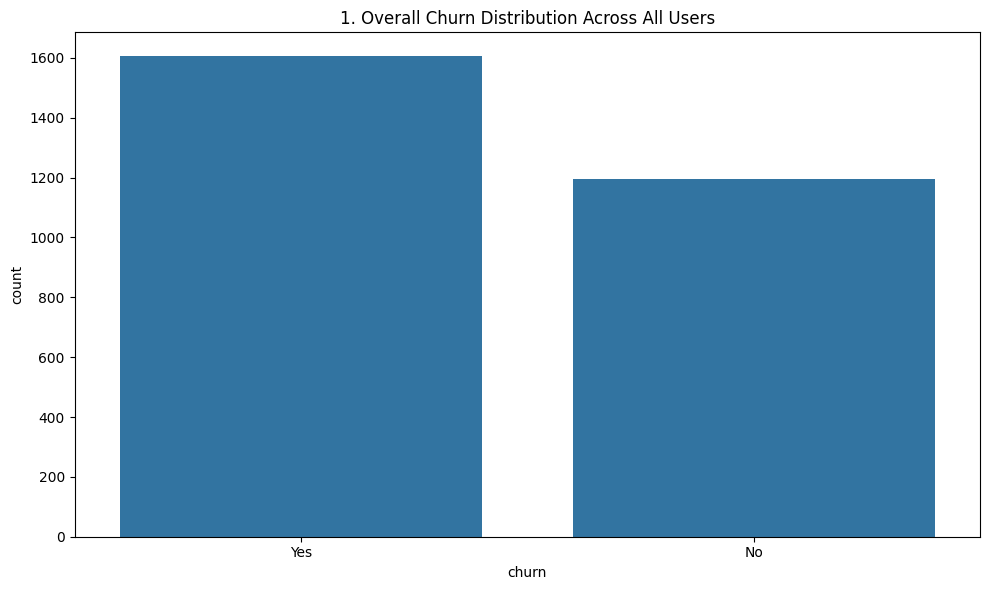

In [13]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="churn", data=df)
plt.title(f'{plot_no}. Overall Churn Distribution Across All Users')
show_fig()
plot_no += 1


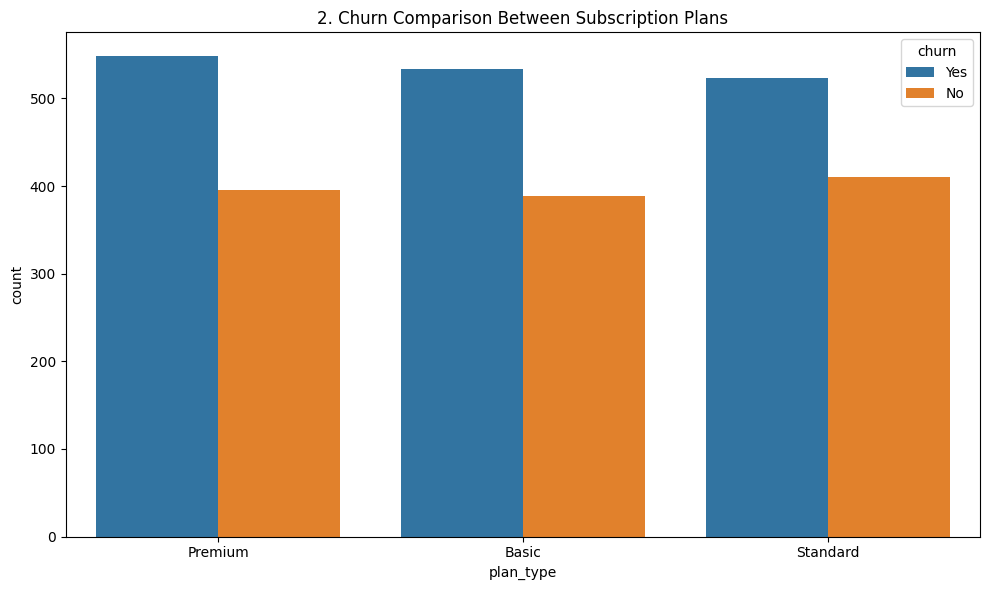

In [14]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x="plan_type", hue="churn", data=df)
plt.title(f'{plot_no}. Churn Comparison Between Subscription Plans')
show_fig()
plot_no += 1


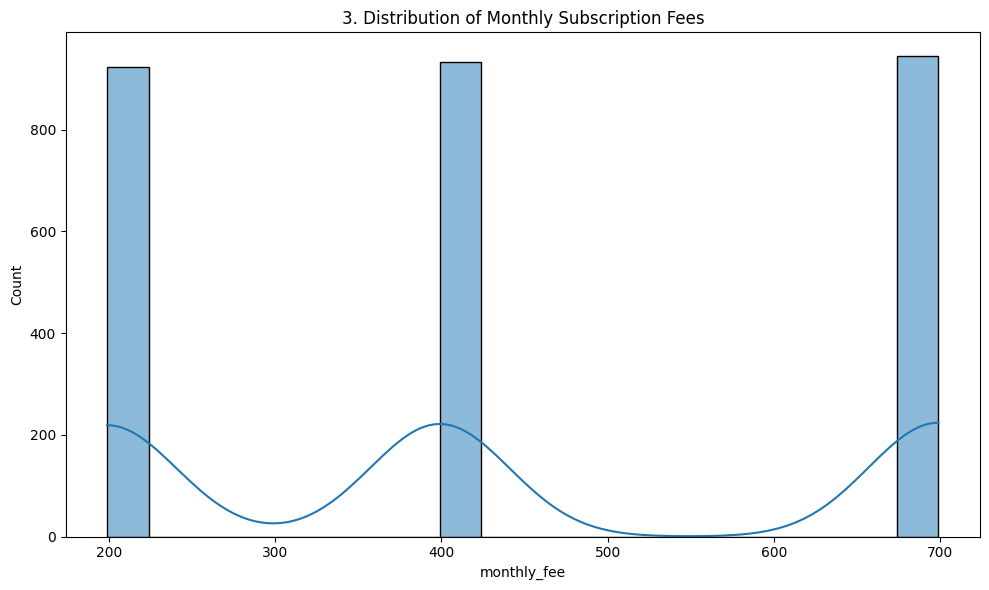

In [15]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["monthly_fee"], bins=20, kde=True)
plt.title(f'{plot_no}. Distribution of Monthly Subscription Fees')
show_fig()
plot_no += 1


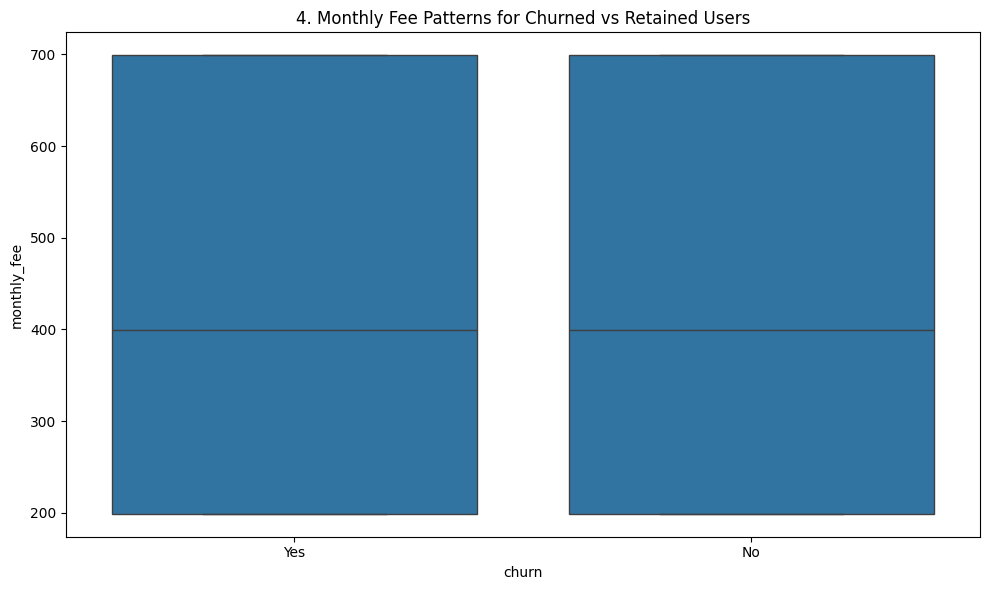

In [16]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="monthly_fee", data=df)
plt.title(f'{plot_no}. Monthly Fee Patterns for Churned vs Retained Users')
show_fig()
plot_no += 1


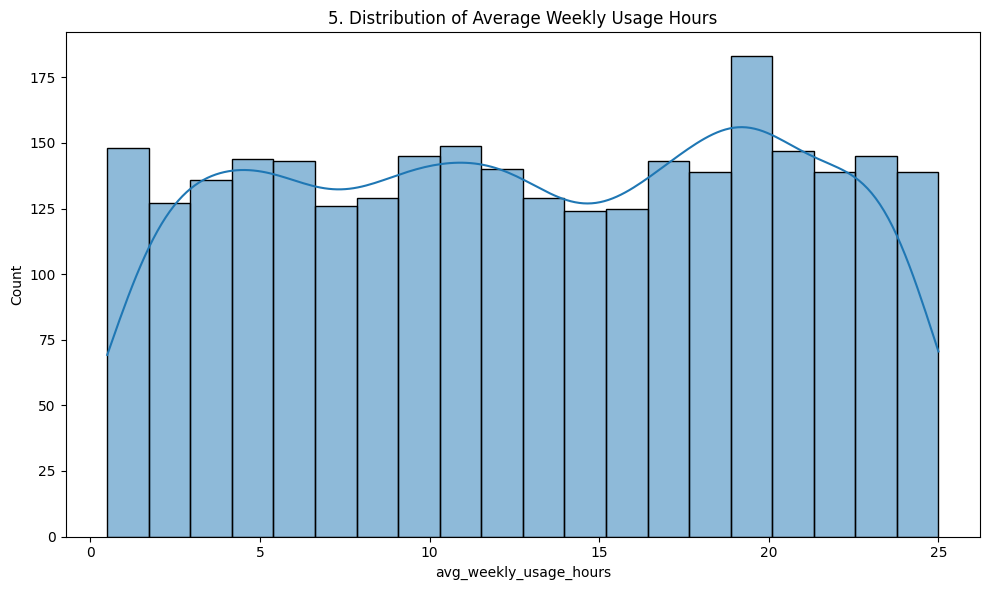

In [17]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["avg_weekly_usage_hours"], bins=20, kde=True)
plt.title(f'{plot_no}. Distribution of Average Weekly Usage Hours')
show_fig()
plot_no += 1


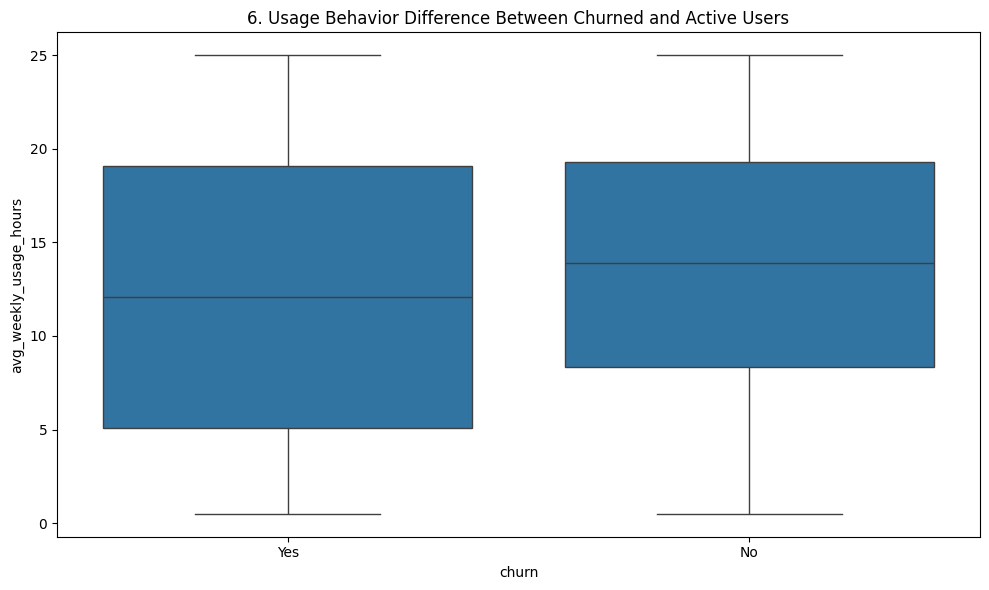

In [18]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="avg_weekly_usage_hours", data=df)
plt.title(f'{plot_no}. Usage Behavior Difference Between Churned and Active Users')
show_fig()
plot_no += 1


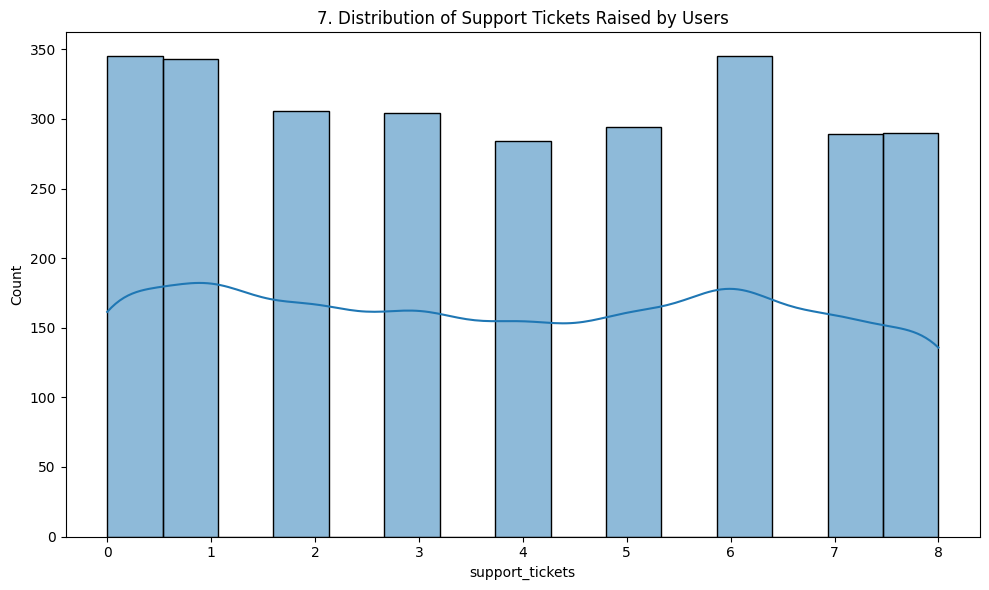

In [19]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["support_tickets"], bins=15, kde=True)
plt.title(f'{plot_no}. Distribution of Support Tickets Raised by Users')
show_fig()
plot_no += 1


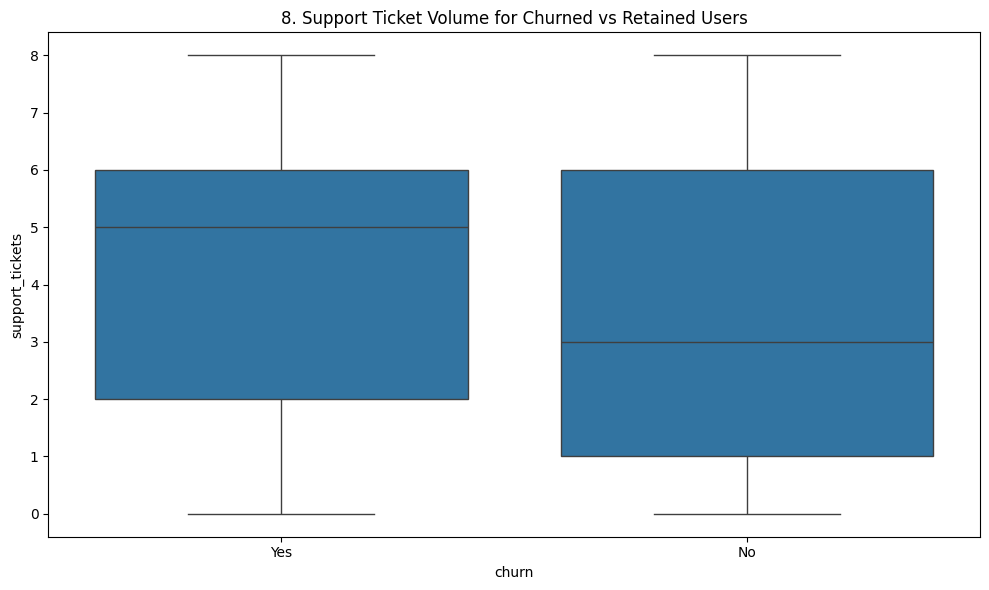

In [20]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="support_tickets", data=df)
plt.title(f'{plot_no}. Support Ticket Volume for Churned vs Retained Users')
show_fig()
plot_no += 1


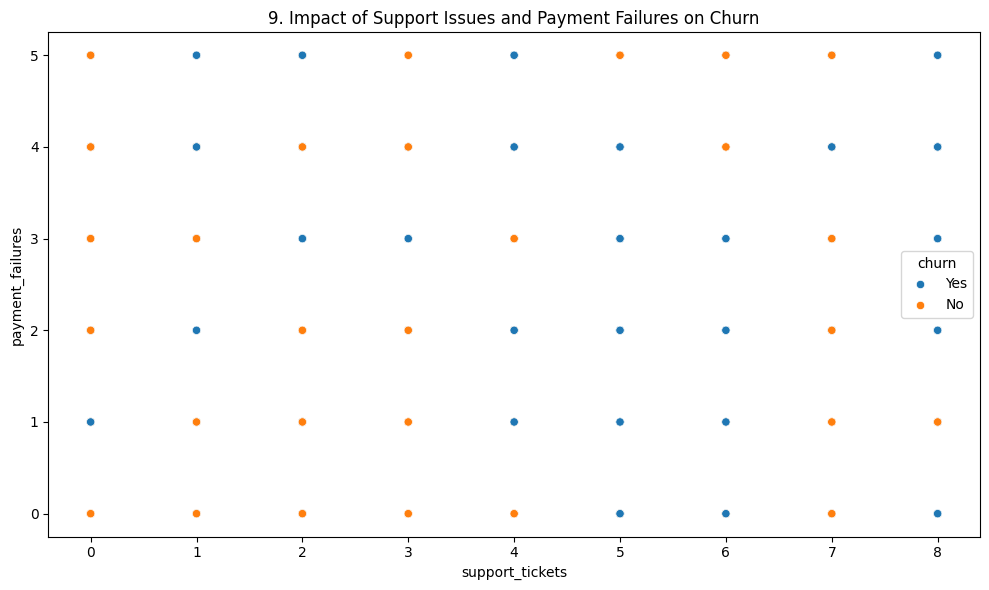

In [21]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x="support_tickets", y="payment_failures", hue="churn", data=df)
plt.title(f'{plot_no}. Impact of Support Issues and Payment Failures on Churn')
show_fig()
plot_no += 1


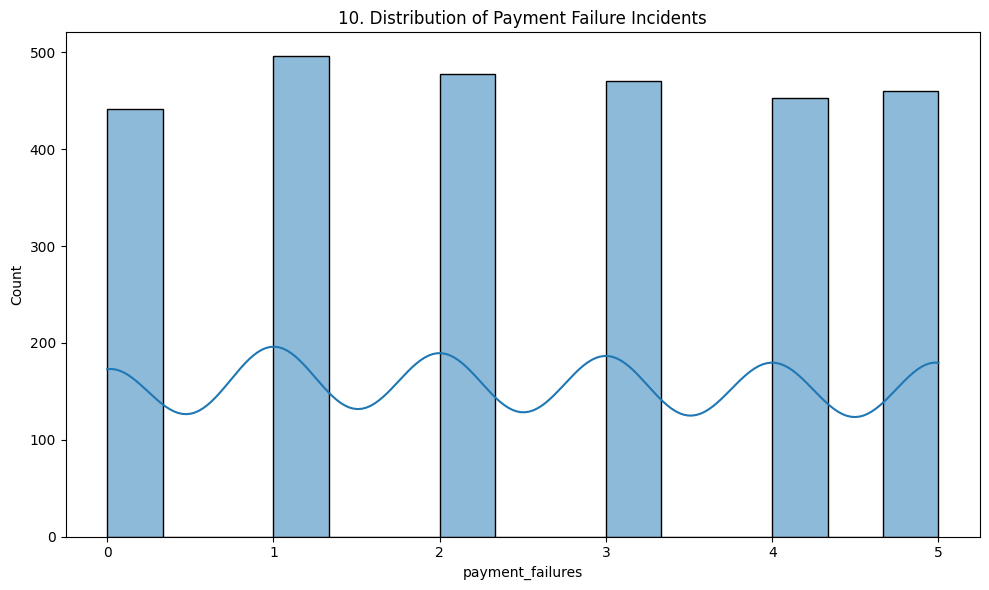

In [22]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["payment_failures"], bins=15, kde=True)
plt.title(f'{plot_no}. Distribution of Payment Failure Incidents')
show_fig()
plot_no += 1


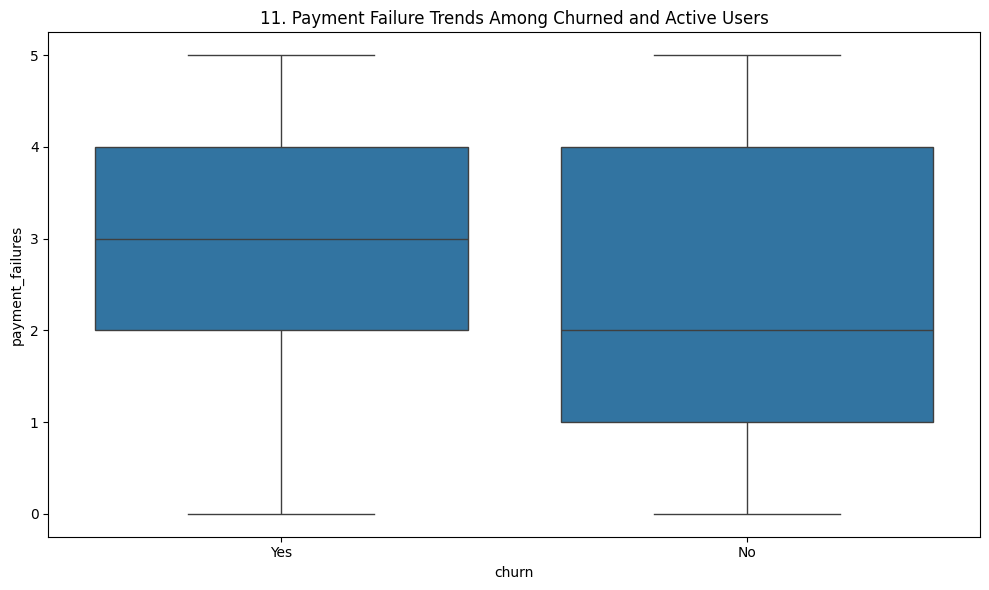

In [23]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="payment_failures", data=df)
plt.title(f'{plot_no}. Payment Failure Trends Among Churned and Active Users')
show_fig()
plot_no += 1


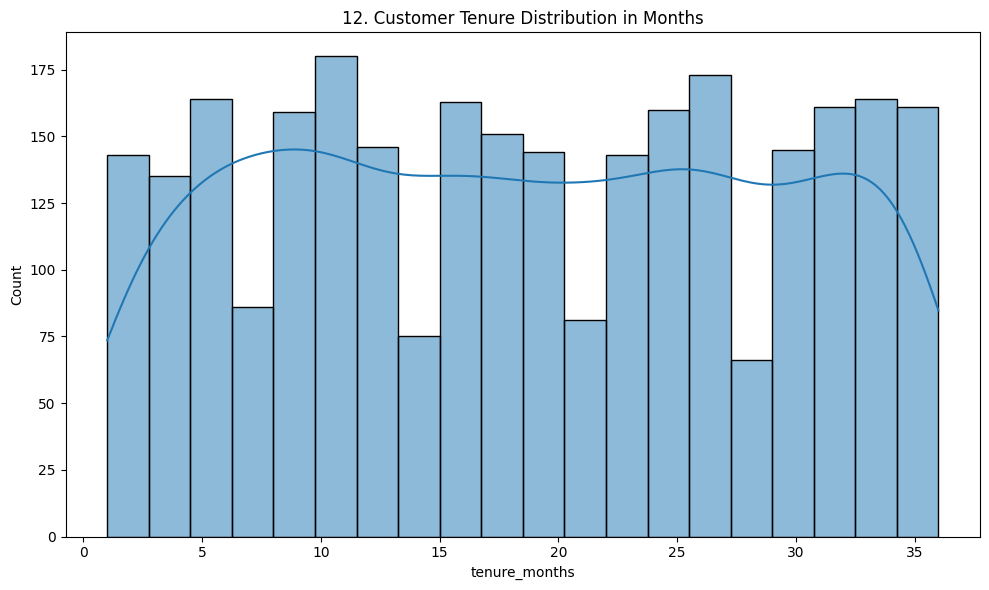

In [24]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["tenure_months"], bins=20, kde=True)
plt.title(f'{plot_no}. Customer Tenure Distribution in Months')
show_fig()
plot_no += 1


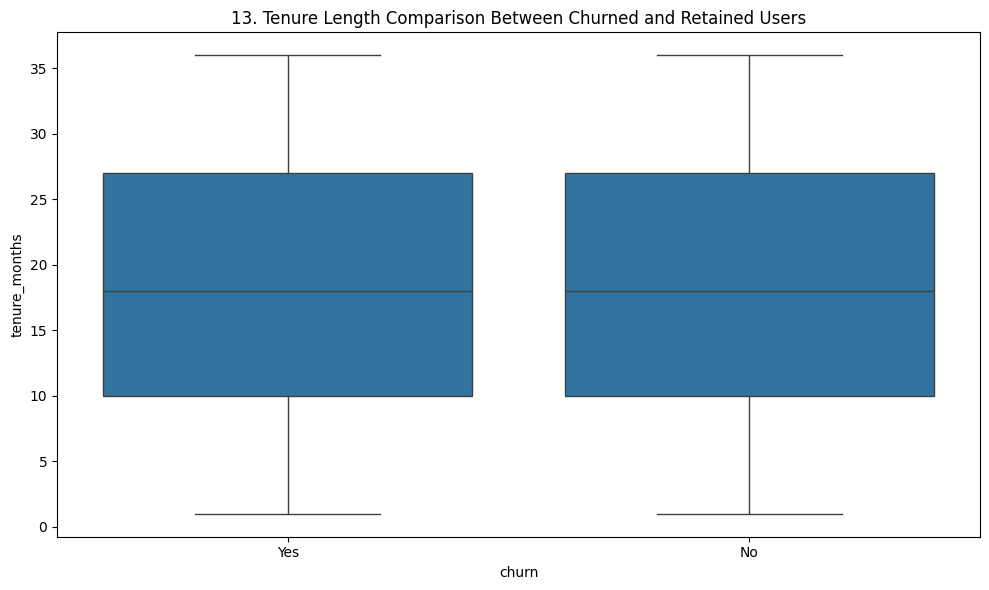

In [25]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="tenure_months", data=df)
plt.title(f'{plot_no}. Tenure Length Comparison Between Churned and Retained Users')
show_fig()
plot_no += 1


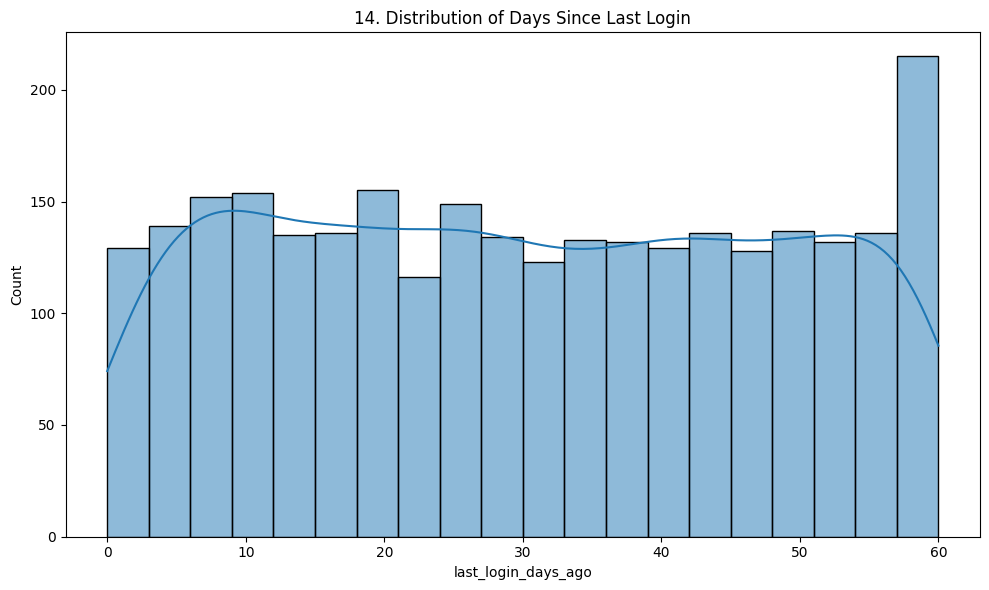

In [26]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["last_login_days_ago"], bins=20, kde=True)
plt.title(f'{plot_no}. Distribution of Days Since Last Login')
show_fig()
plot_no += 1


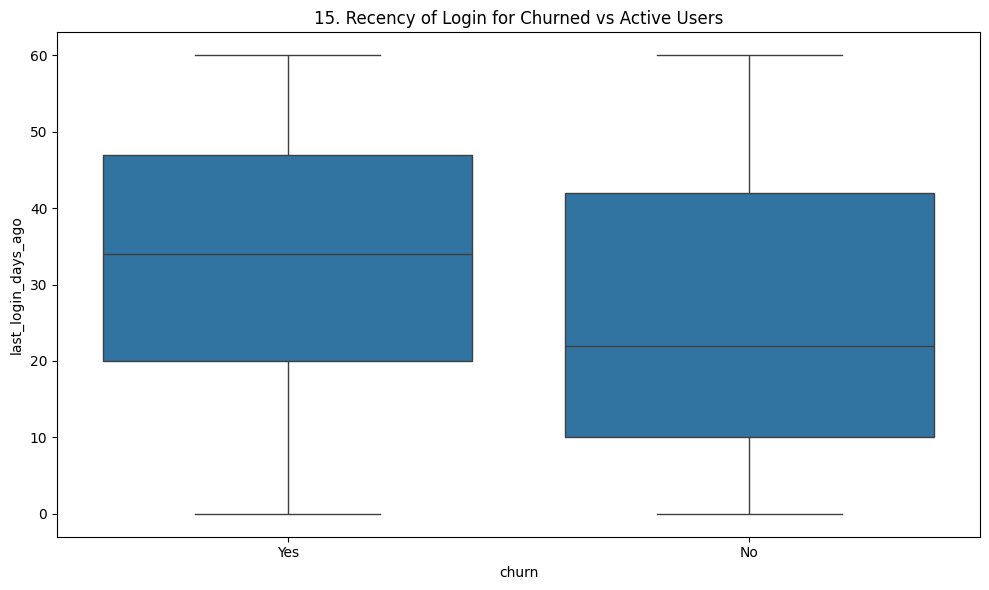

In [27]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="churn", y="last_login_days_ago", data=df)
plt.title(f'{plot_no}. Recency of Login for Churned vs Active Users')
show_fig()
plot_no += 1


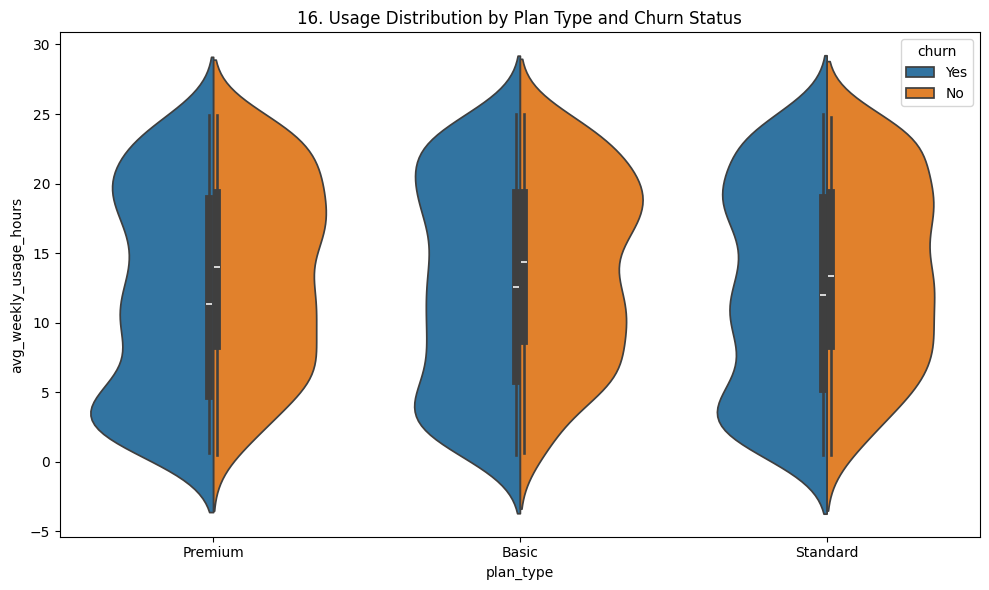

In [28]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(x="plan_type", y="avg_weekly_usage_hours", hue="churn", split=True, data=df)
plt.title(f'{plot_no}. Usage Distribution by Plan Type and Churn Status')
show_fig()
plot_no += 1


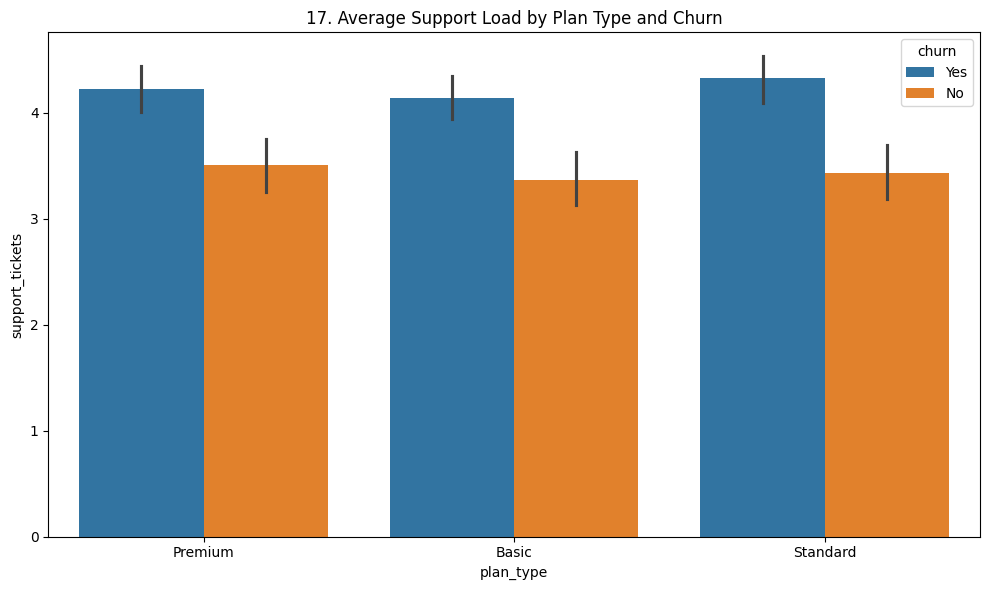

In [29]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x="plan_type", y="support_tickets", hue="churn", data=df, estimator="mean")
plt.title(f'{plot_no}. Average Support Load by Plan Type and Churn')
show_fig()
plot_no += 1


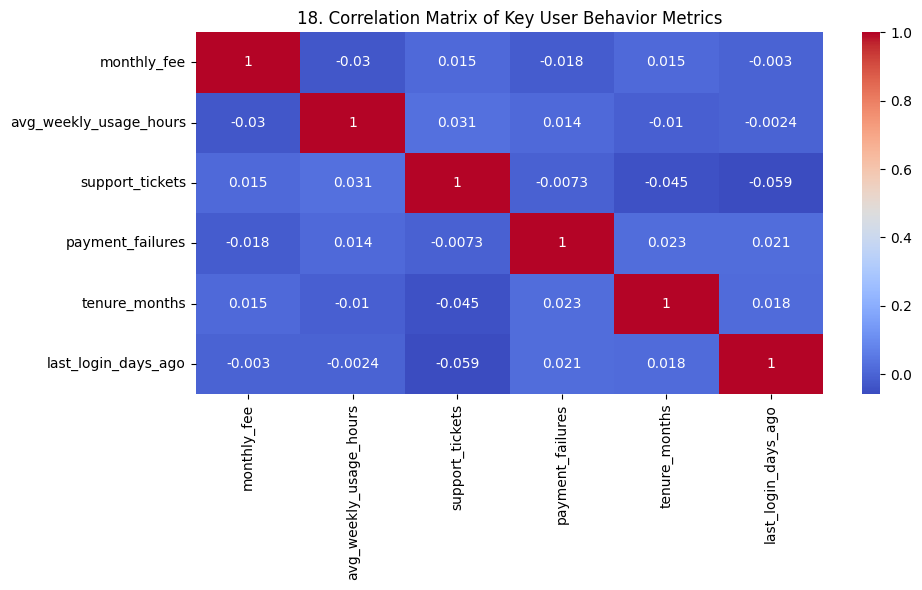

In [30]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df[["monthly_fee","avg_weekly_usage_hours","support_tickets","payment_failures","tenure_months","last_login_days_ago"]].corr(), annot=True, cmap="coolwarm")
plt.title(f'{plot_no}. Correlation Matrix of Key User Behavior Metrics')
show_fig()
plot_no += 1


# Model Training

## Encode target variable

In [31]:
le = LabelEncoder()
df["churn"] = le.fit_transform(df["churn"])

## Select features and target

In [32]:
X = df[[
    "monthly_fee",
    "avg_weekly_usage_hours",
    "support_tickets",
    "payment_failures",
    "tenure_months",
    "last_login_days_ago"
]]
y = df["churn"]

## Train-test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Feature scaling

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression model

In [35]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Make predictions

In [36]:
y_pred = model.predict(X_test_scaled)

## Print accuracy score

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

Model Accuracy: 66.79 %


## Confusion matrix visualization

<Figure size 1000x600 with 0 Axes>

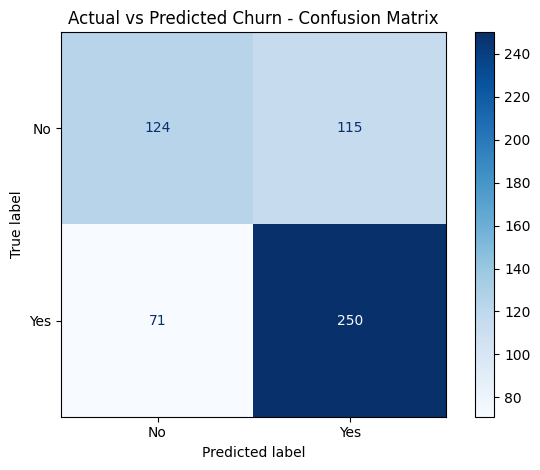

In [38]:
fig = plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(cmap="Blues")
plt.title("Actual vs Predicted Churn - Confusion Matrix")
plt.tight_layout()
plt.show()